# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as sql
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline ,make_pipeline
import joblib
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from flaml import AutoML

In [2]:
df_t = sql.connect(host = "localhost",user="rupesh",password="12345",database="renal")
sql_query="SELECT * FROM renal.solar_mixed;"


In [3]:
df = pd.read_sql(sql_query,df_t)

C:\Users\Sai Ram\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
df

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000041,2.369843,90.429688,147.949219,0.616820,-0.530396,-0.160283,-146.003418,120.255127,25.595601,1,50,1,50,1
1,0.000141,2.449310,90.161133,148.535156,0.603393,-0.543823,-0.193853,-147.052155,117.362060,29.951274,1,50,1,50,1
2,0.000241,2.345245,90.740967,147.656250,0.630248,-0.503540,-0.193853,-149.463043,113.564911,35.094503,1,50,1,50,1
3,0.000341,2.176849,91.003418,147.656250,0.636962,-0.496826,-0.213994,-149.559479,112.058105,39.361776,1,50,1,50,1
4,0.000441,2.226044,91.113281,147.363281,0.643676,-0.483398,-0.227422,-151.982422,106.271973,45.336761,1,50,1,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56629,0.201266,2.305511,87.182617,148.828125,-0.316407,0.711670,-0.401982,45.204163,-149.414825,110.338338,1,50,156,50,0
56630,0.201366,2.331055,86.810303,148.828125,-0.323121,0.711670,-0.422124,49.073639,-150.330963,106.999257,1,50,156,50,0
56631,0.201466,2.352814,86.956787,148.535156,-0.349977,0.711670,-0.368413,54.534302,-151.415863,103.266398,1,50,156,50,0
56632,0.201566,2.399170,86.877441,149.121094,-0.356690,0.698242,-0.388555,57.945709,-152.500763,99.465230,1,50,156,50,0


In [5]:
df = df.drop(["Time"],axis=1)

In [6]:
df['label'].value_counts()

0    28318
1    28316
Name: label, dtype: int64

# Auto-EDA

In [7]:
#import pandas_profiling as pp

In [8]:
#pp.ProfileReport(df)

# EDA

In [9]:
df.describe()

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
count,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000,56634.000000
mean,1.896756,94.463172,145.809456,-0.014438,0.006081,-0.021652,1.069118,0.081755,1.080606,0.585479,50.028781,145.019441,49.995745,0.499982
std,0.409502,7.110356,2.232900,0.421103,0.428698,0.407813,109.806693,109.915514,109.804489,0.492644,0.323890,36.146492,0.065095,0.500004
min,0.930908,73.126221,131.835938,-0.806520,-0.892944,-0.811528,-161.216126,-161.216126,-159.275360,0.000000,49.000000,1.000000,49.000000,0.000000
25%,1.489075,89.996338,143.847656,-0.403687,-0.389404,-0.388555,-108.514099,-109.764748,-108.722038,0.000000,50.000000,155.000000,50.000000,0.000000
50%,1.880737,92.218018,145.019531,-0.014283,0.013428,-0.039434,1.579132,-0.397797,1.426442,1.000000,50.000000,155.000000,50.000000,0.000000
75%,2.288483,101.257324,147.949219,0.381835,0.402832,0.363398,111.057587,110.271034,110.960147,1.000000,50.000000,155.000000,50.000000,1.000000
max,3.213715,103.656006,154.394531,0.818236,0.812378,0.746089,159.636993,159.636993,158.998108,1.000000,51.000000,156.000000,50.000000,1.000000


In [10]:
#finding correlation between the the attributes
df.corr()

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
Ipv,1.000000,-0.813340,0.878458,0.003634,-0.005687,-0.020242,0.001973,-0.004103,-0.000448,0.679709,0.201457,-0.001282,0.029220,-0.019567
Vpv,-0.813340,1.000000,-0.648988,-0.001984,-0.002940,0.011223,-0.002161,0.004847,-0.001091,-0.482541,-0.279072,0.027691,-0.037670,0.208622
Vdc,0.878458,-0.648988,1.000000,-0.012625,0.017852,-0.028406,0.022330,-0.028746,0.008690,0.717437,0.182407,-0.010388,0.019390,-0.107153
ia,0.003634,-0.001984,-0.012625,1.000000,-0.525390,-0.478198,-0.980717,0.507105,0.473116,0.006173,-0.018677,0.000741,0.024178,0.008872
ib,-0.005687,-0.002940,0.017852,-0.525390,1.000000,-0.491468,0.507696,-0.978375,0.479839,-0.003261,0.010815,0.008489,-0.061997,-0.011101
ic,-0.020242,0.011223,-0.028406,-0.478198,-0.491468,1.000000,0.477743,0.491502,-0.978519,-0.026438,0.012135,-0.017166,0.040139,-0.033254
va,0.001973,-0.002161,0.022330,-0.980717,0.507696,0.477743,1.000000,-0.509140,-0.490381,-0.003236,0.017844,0.000923,-0.025581,0.000785
vb,-0.004103,0.004847,-0.028746,0.507105,-0.978375,0.491502,-0.509140,1.000000,-0.500099,-0.005390,-0.008719,-0.009756,0.066668,0.002835
vc,-0.000448,-0.001091,0.008690,0.473116,0.479839,-0.978519,-0.490381,-0.500099,1.000000,0.008805,-0.009126,0.009500,-0.042469,-0.005132
Iabc,0.679709,-0.482541,0.717437,0.006173,-0.003261,-0.026438,-0.003236,-0.005390,0.008805,1.000000,0.109298,-0.173368,0.043003,0.011368


In [11]:
df.var()

Ipv          0.167692
Vpv         50.557163
Vdc          4.985844
ia           0.177328
ib           0.183782
ic           0.166312
va       12057.509837
vb       12081.420287
vc       12057.025789
Iabc         0.242698
If           0.104905
Vabc      1306.568919
Vf           0.004237
label        0.250004
dtype: float64

In [12]:
df.std()

Ipv        0.409502
Vpv        7.110356
Vdc        2.232900
ia         0.421103
ib         0.428698
ic         0.407813
va       109.806693
vb       109.915514
vc       109.804489
Iabc       0.492644
If         0.323890
Vabc      36.146492
Vf         0.065095
label      0.500004
dtype: float64

# Countplot

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


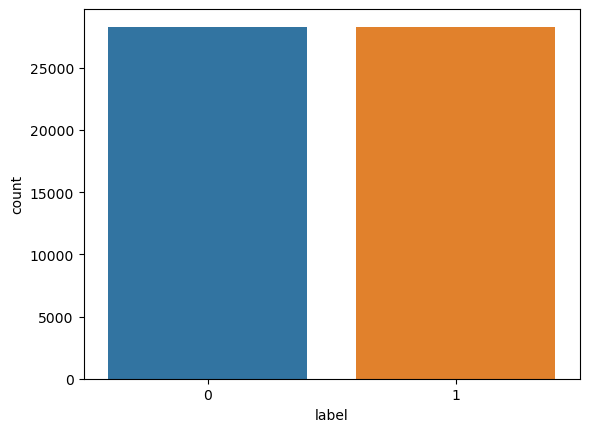

In [13]:
sns.countplot(df["label"],data = df)
plt.show()


In [14]:
y = df.iloc[:,-1:]

In [15]:
X = df.drop(["label"],axis=1)

In [16]:
y.value_counts()

label
0        28318
1        28316
dtype: int64

# Histogram

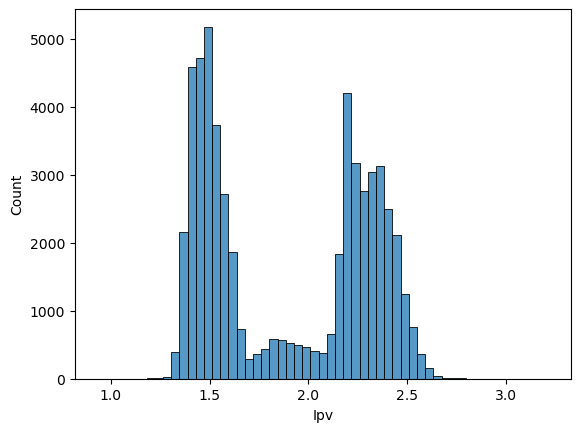

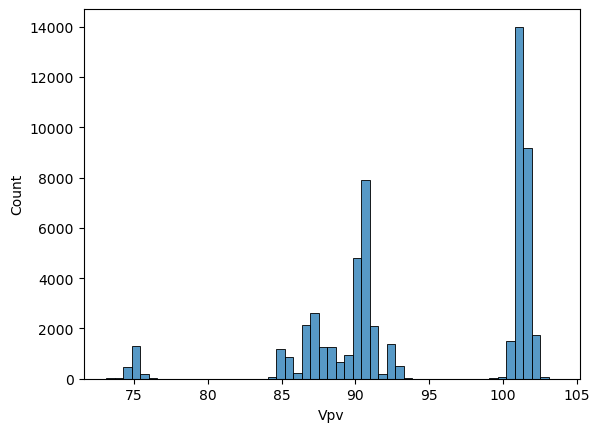

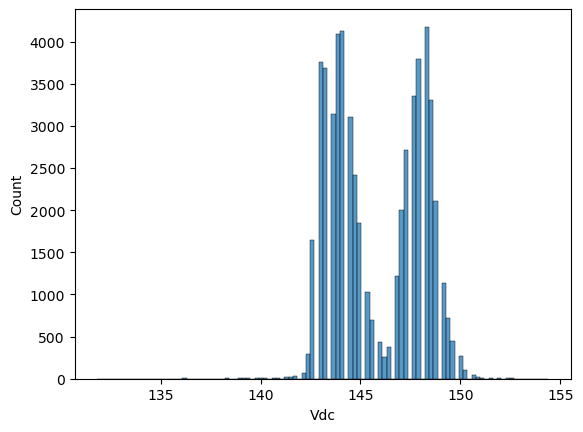

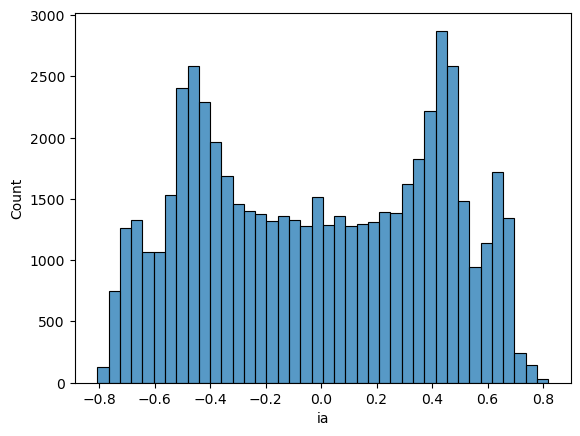

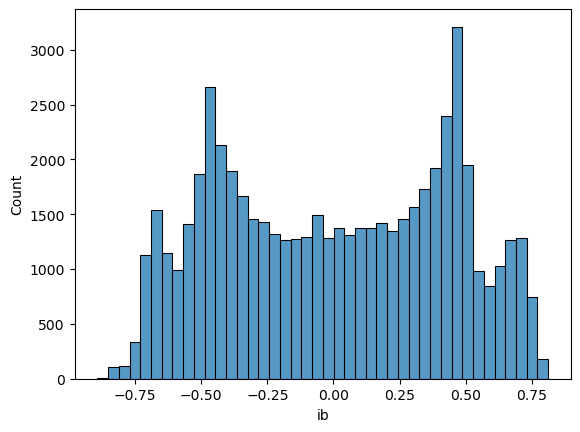

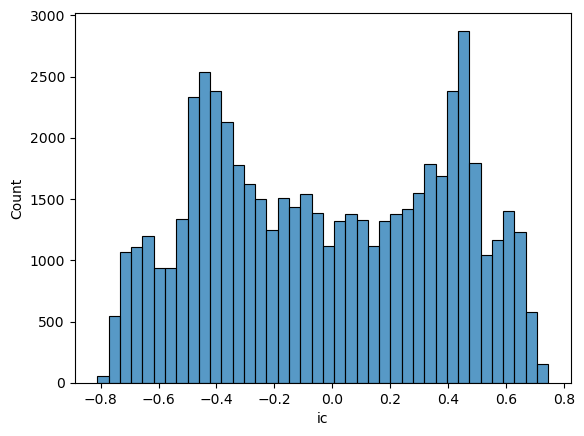

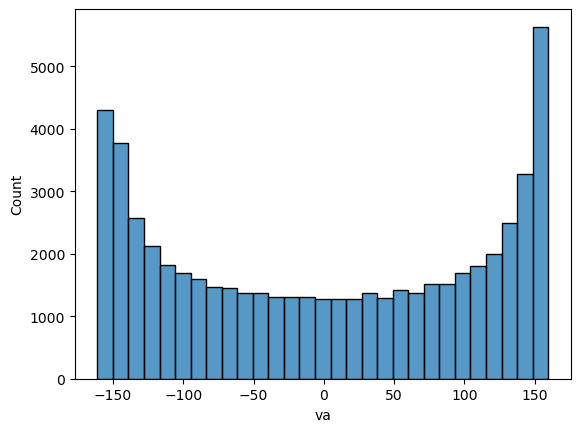

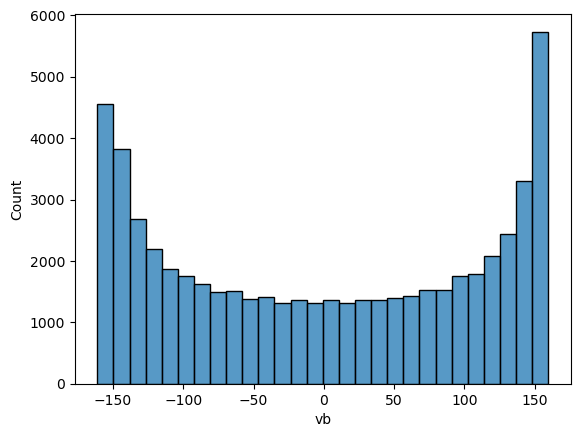

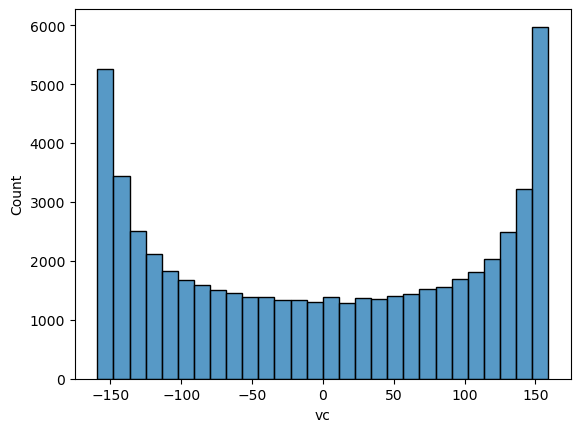

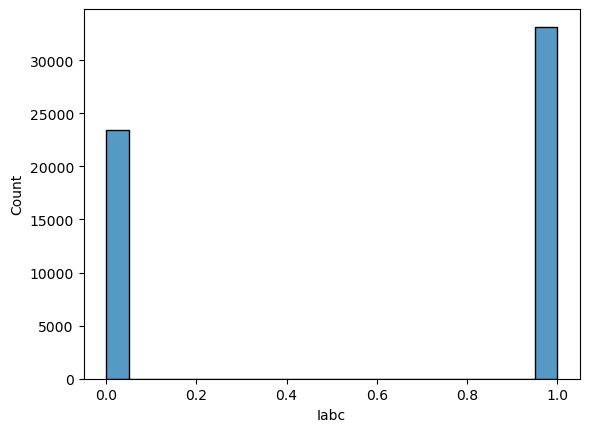

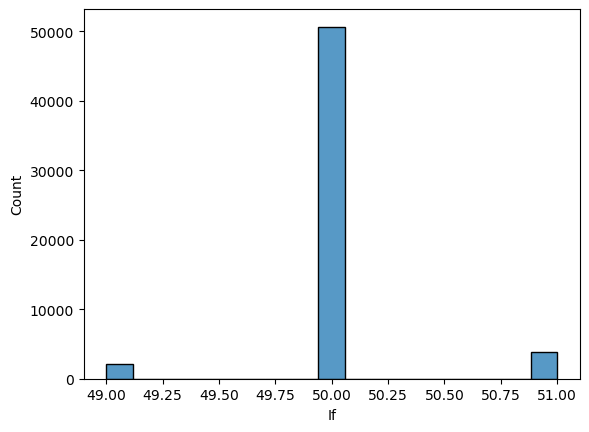

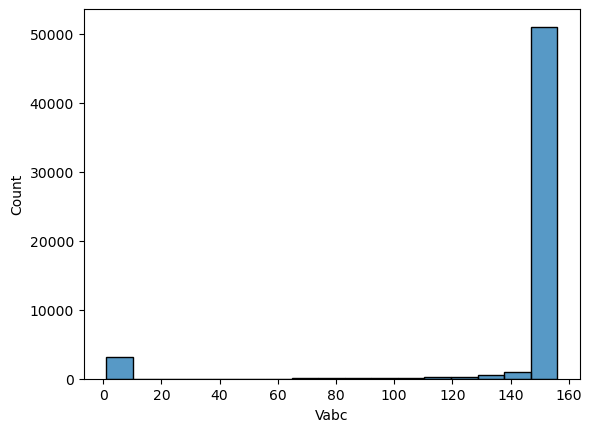

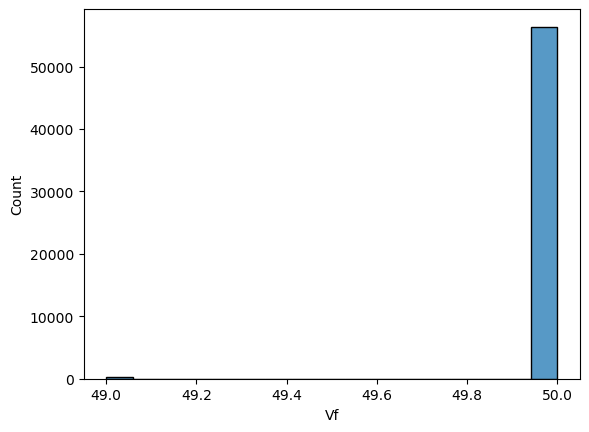

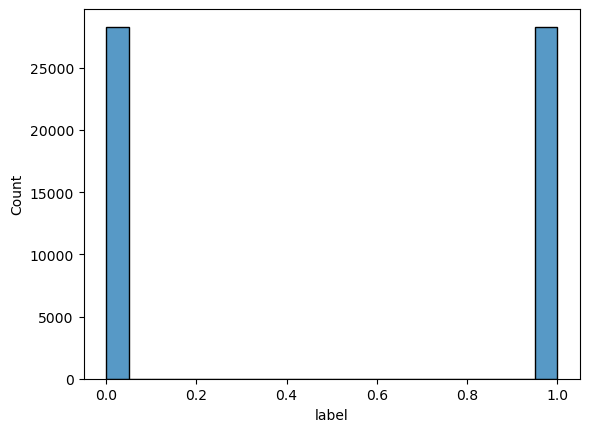

In [17]:
for i in df:
    sns.histplot(df[i],kde=False)
    plt.show()

# Boxplot

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


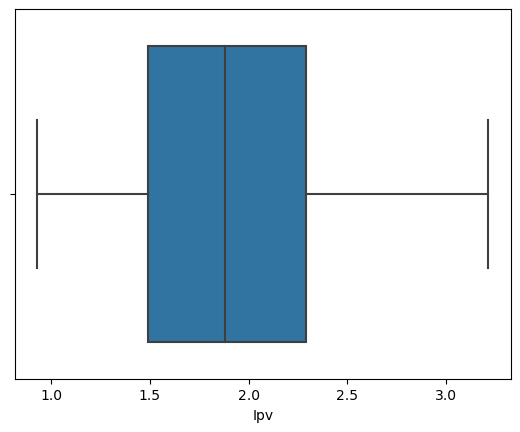

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


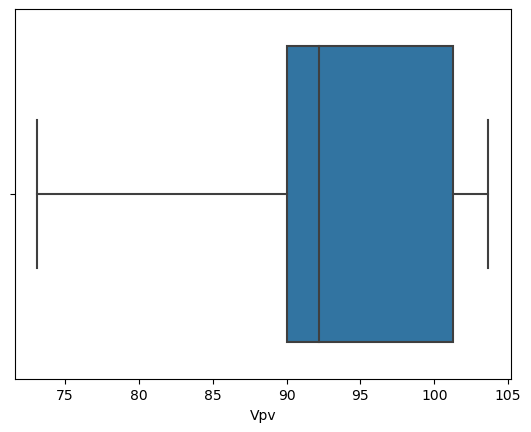

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


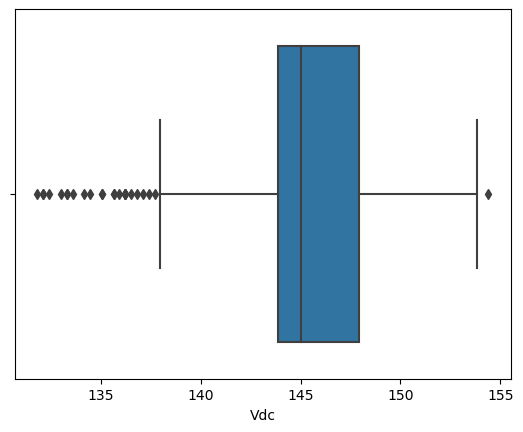

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


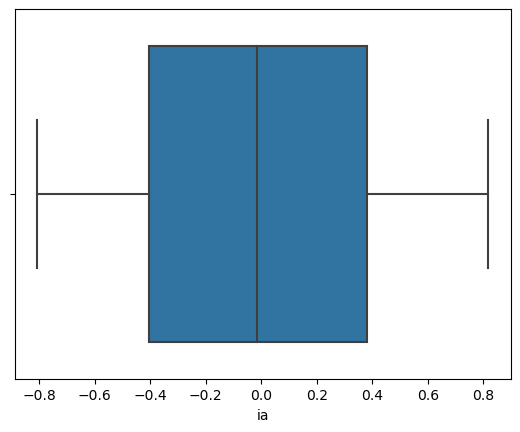

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


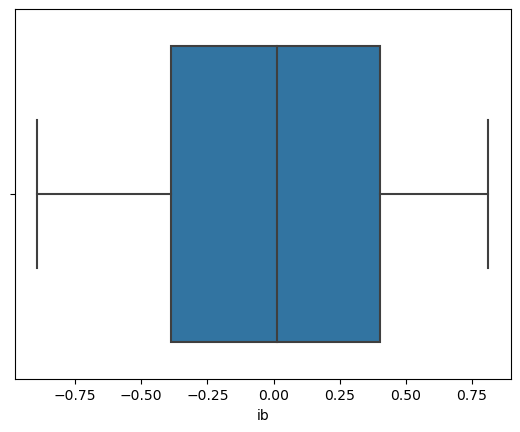

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


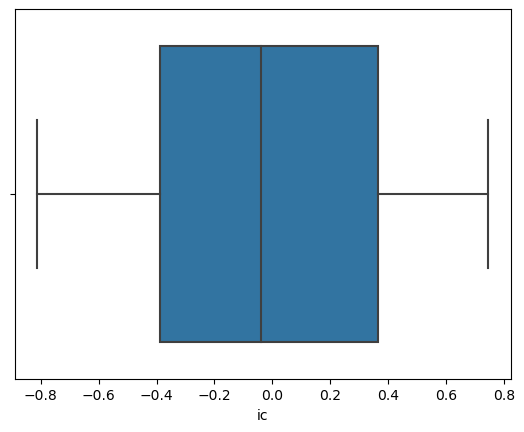

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


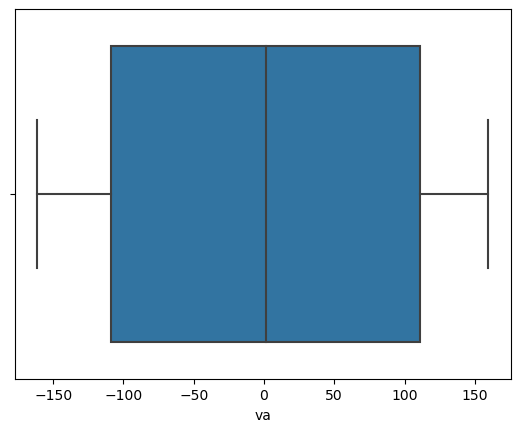

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


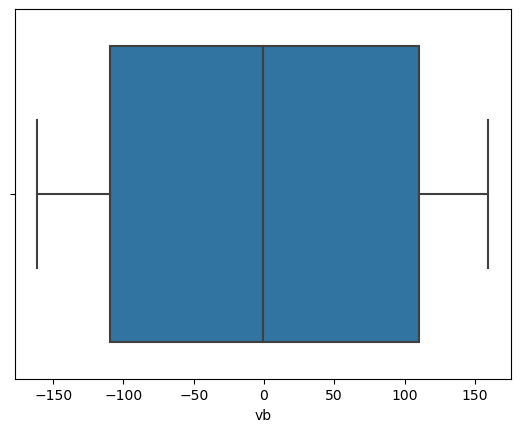

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


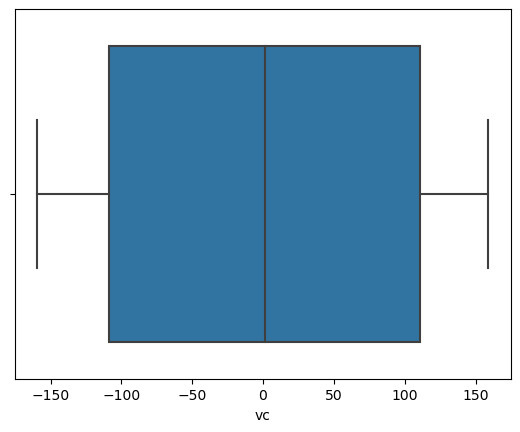

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


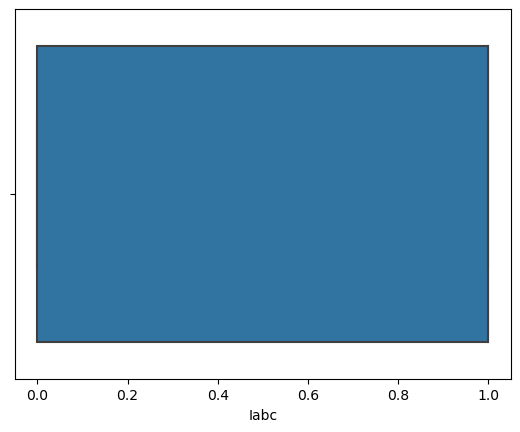

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


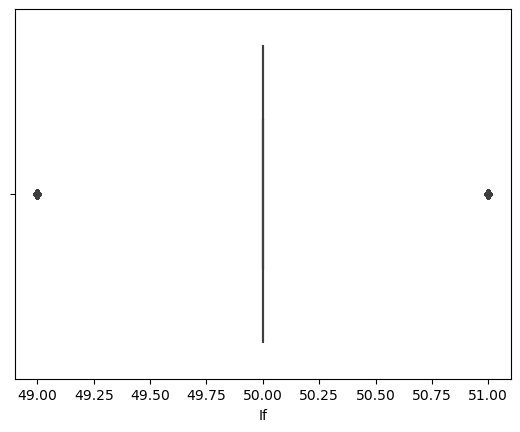

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


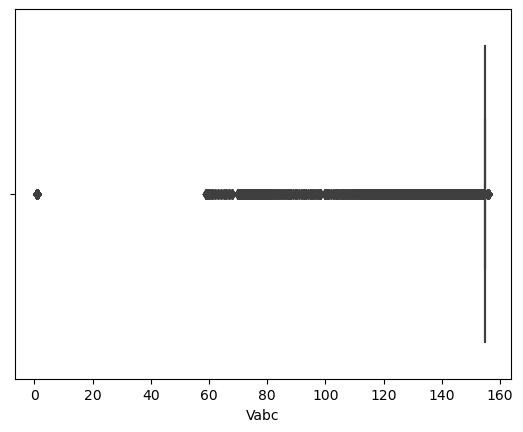

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


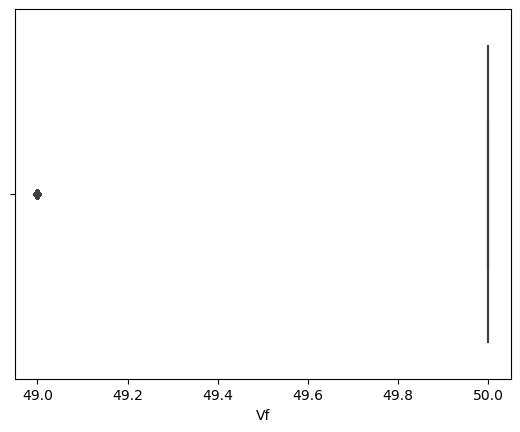

"Checking for the Outliers\nWe can clearly seen that 'Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'Iabc', 'if', 'Vabc' and 'Vf' have Outliers.\nWe don't have outliers in 'Time', 'va', 'vb' and 'vc' attributes.\n"

In [18]:
for i in X:
    sns.boxplot(X[i])
    plt.show()

"""Checking for the Outliers
We can clearly seen that 'Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'Iabc', 'if', 'Vabc' and 'Vf' have Outliers.
We don't have outliers in 'Time', 'va', 'vb' and 'vc' attributes.
"""

<AxesSubplot:>

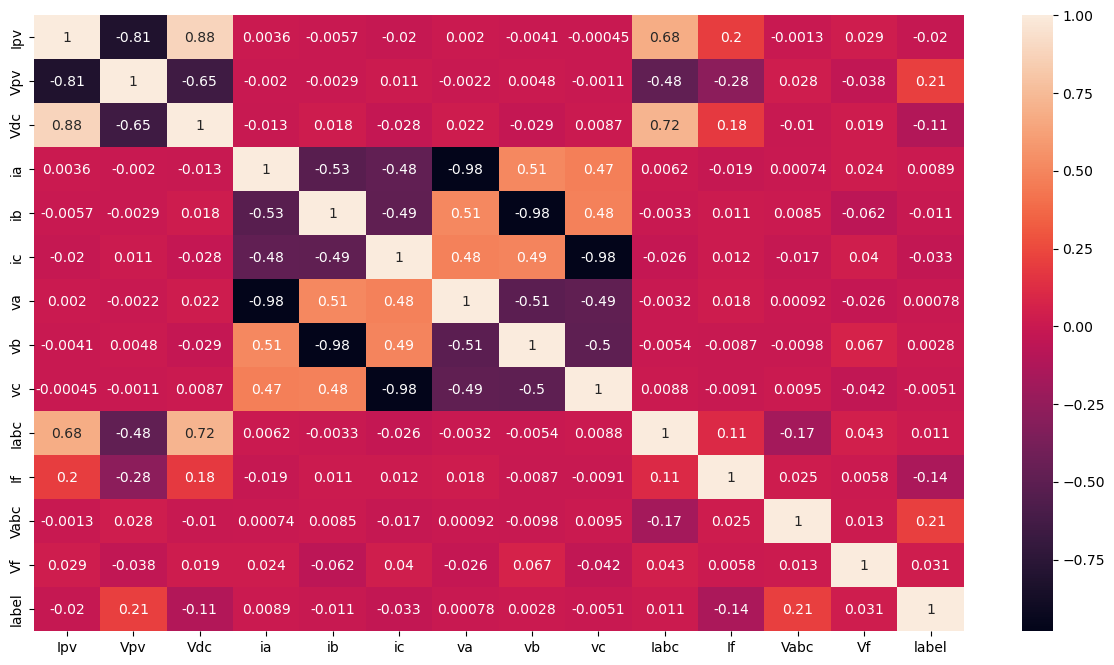

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot =True)

# Probability and Distribution Plot

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


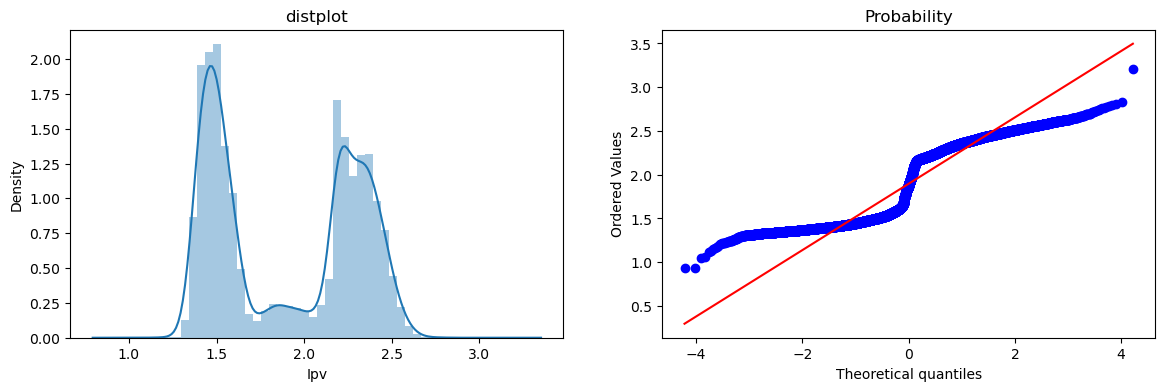

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


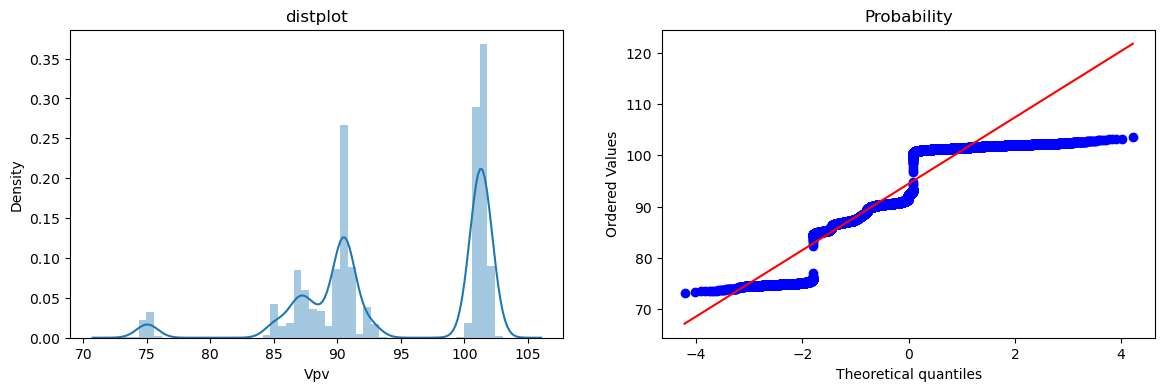

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


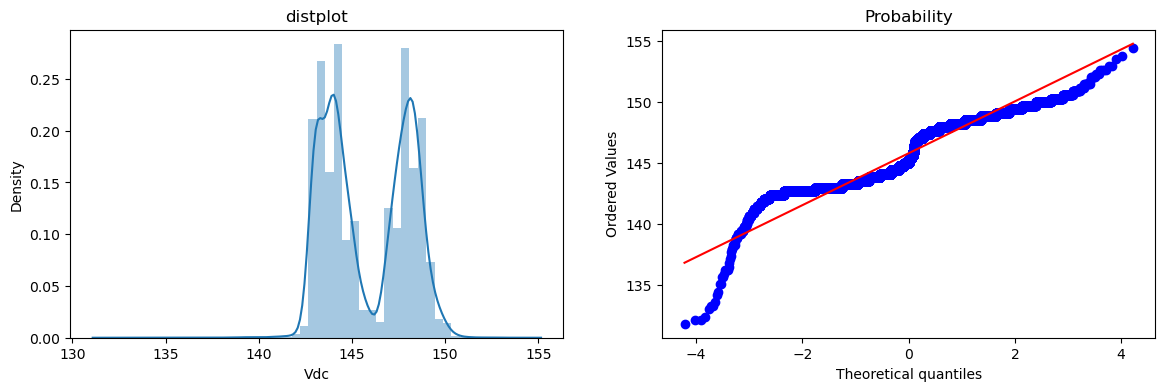

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


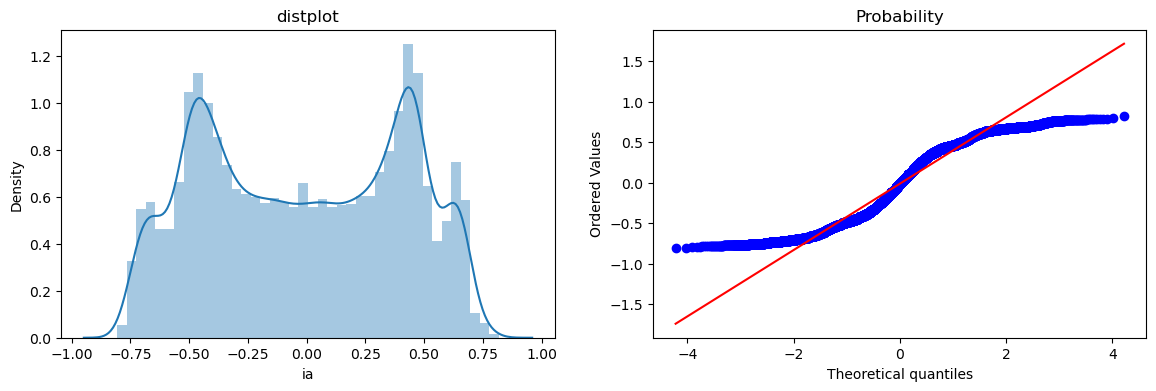

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


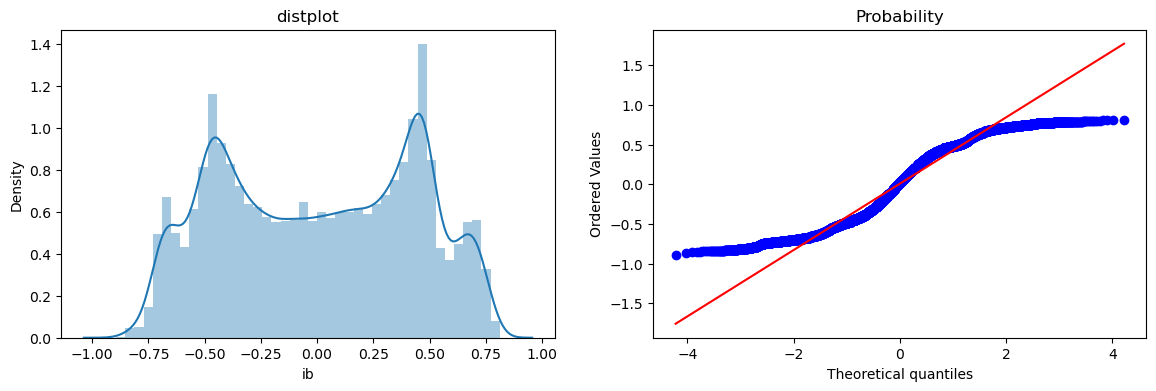

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


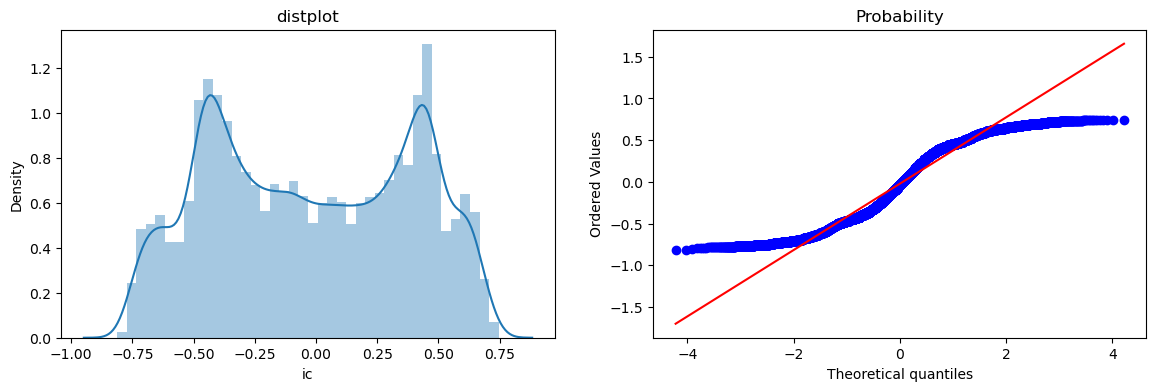

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


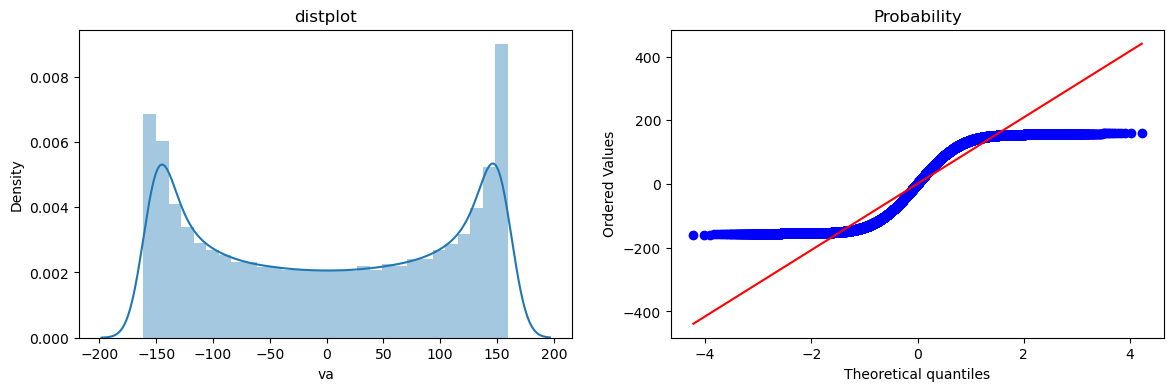

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


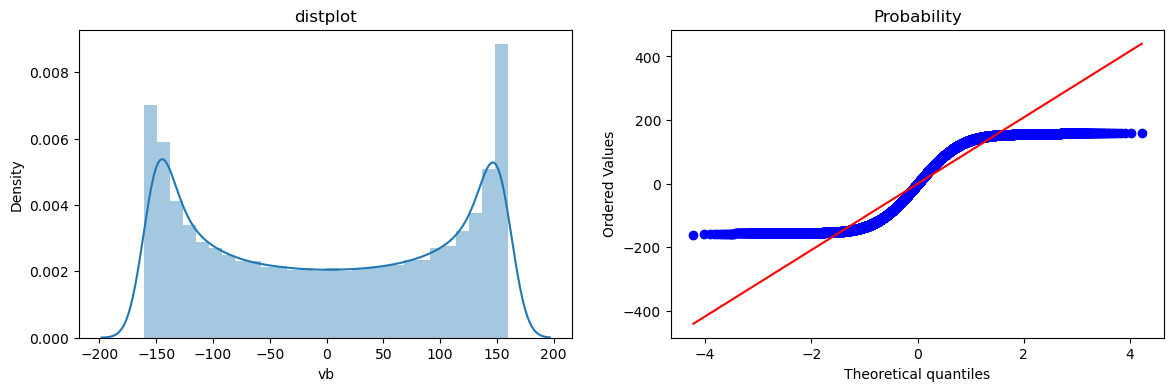

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


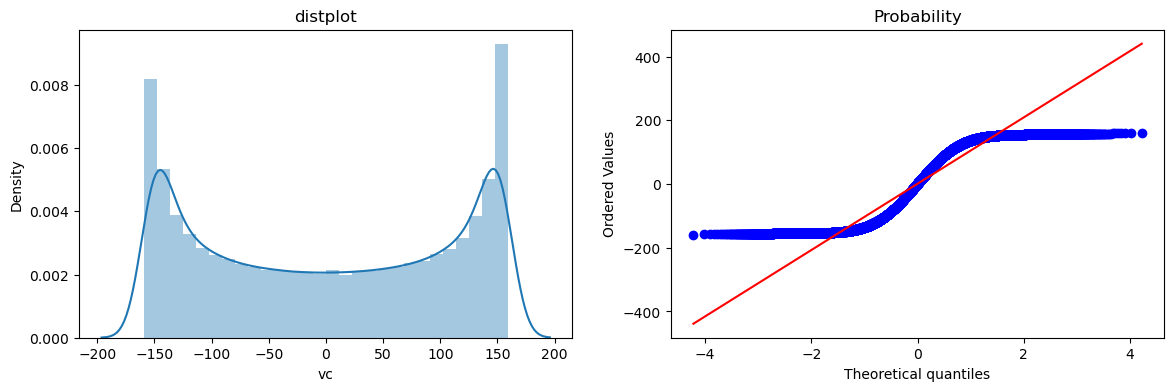

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


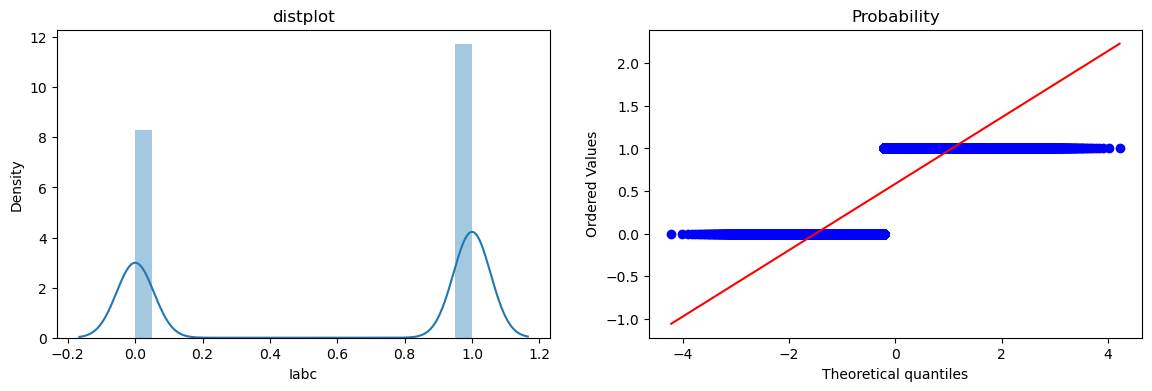

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


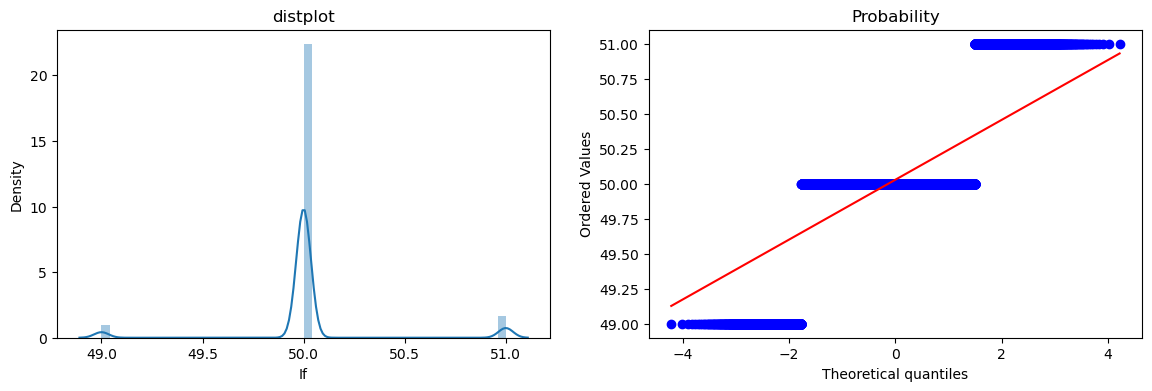

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


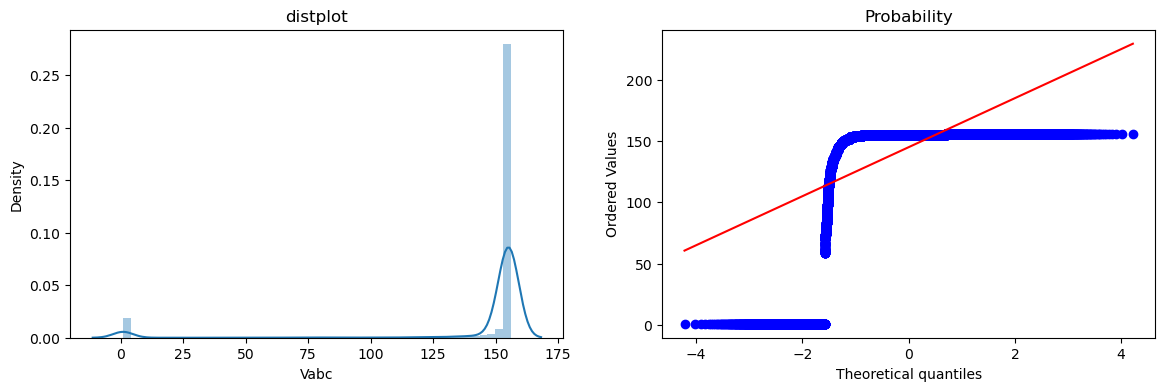

C:\Users\Sai Ram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


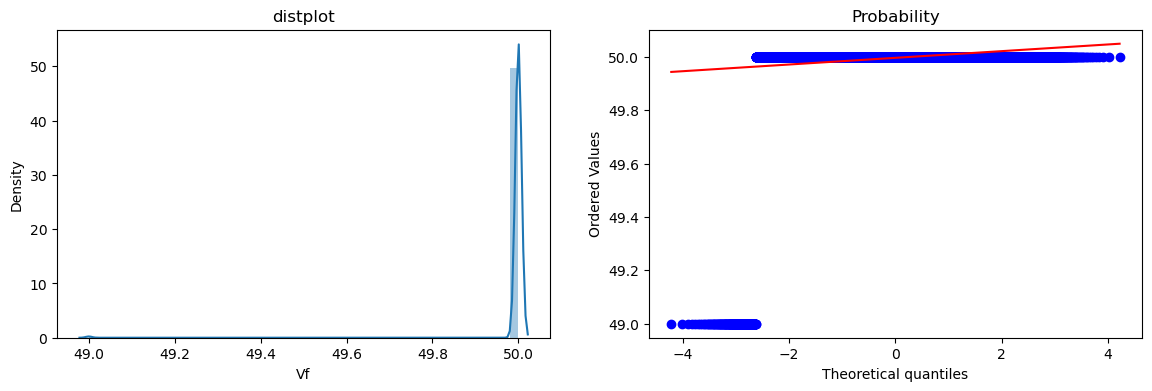

In [20]:
for i in X.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X[i])
    plt.title("distplot")
   

    plt.subplot(122)
    stats.probplot(X[i], dist="norm", plot=plt)
    plt.title("Probability")
    

    plt.show()

# Transformation

In [21]:
trf = FunctionTransformer(func=np.log1p)

X_transformed = trf.fit_transform(X)


C:\Users\Sai Ram\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


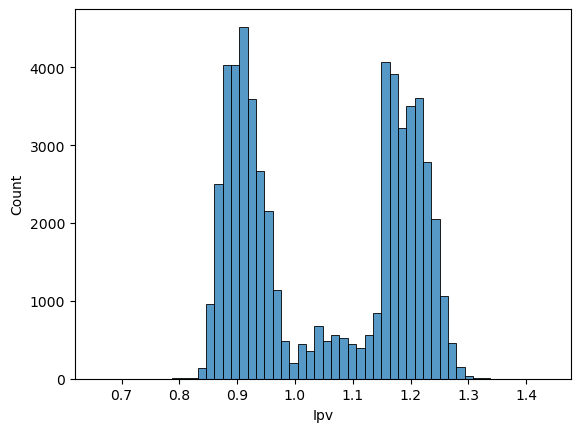

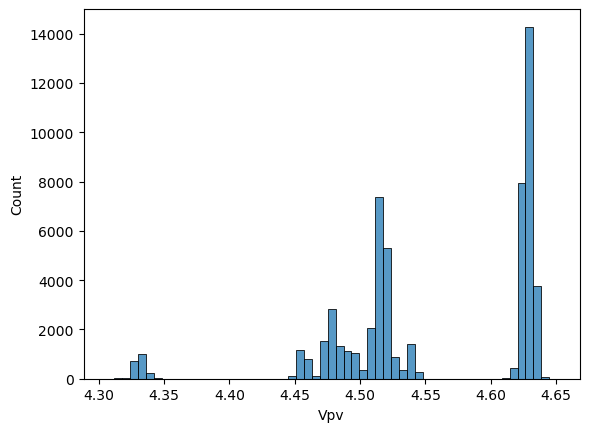

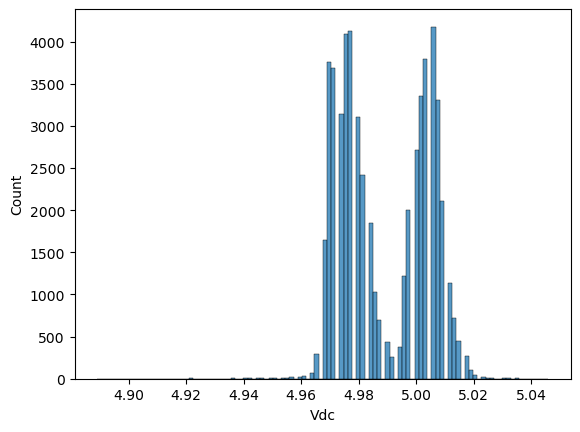

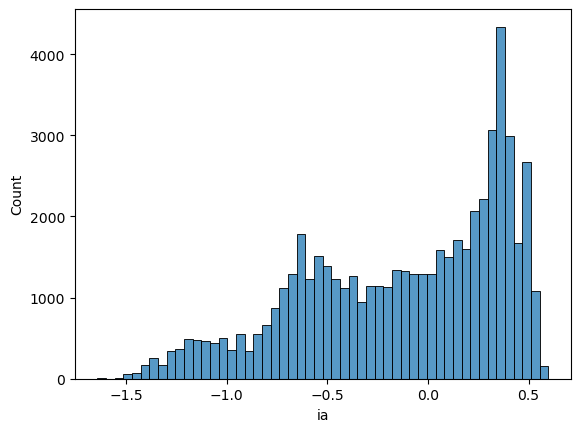

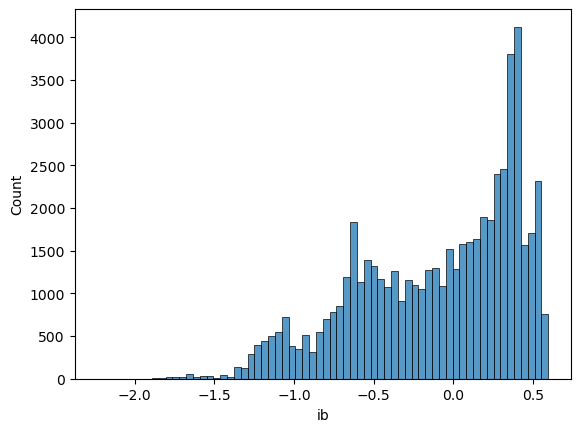

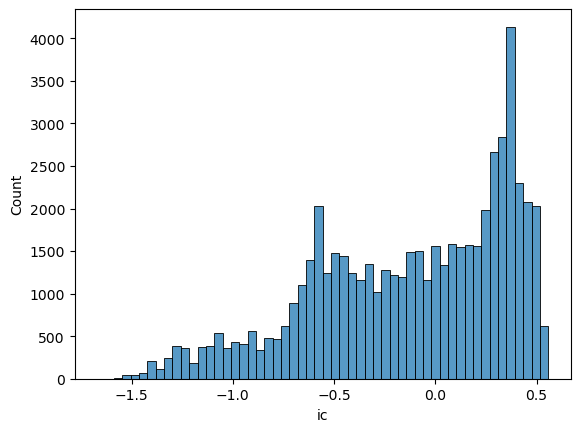

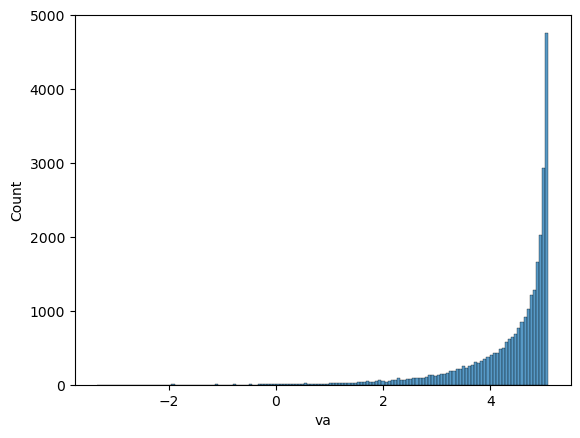

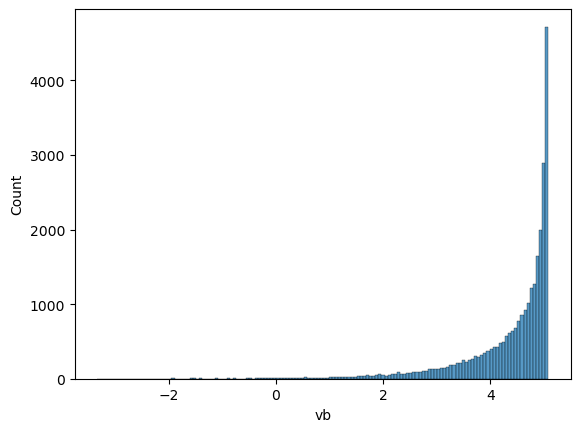

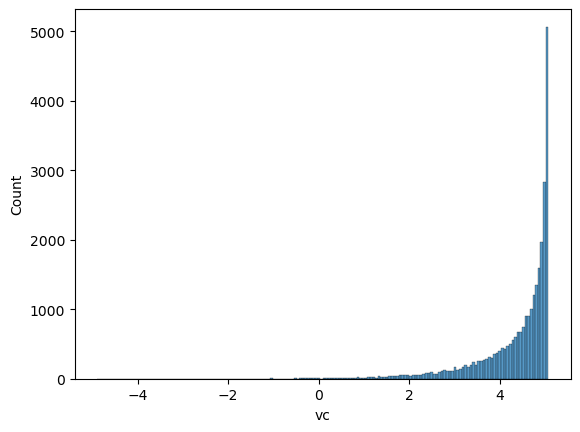

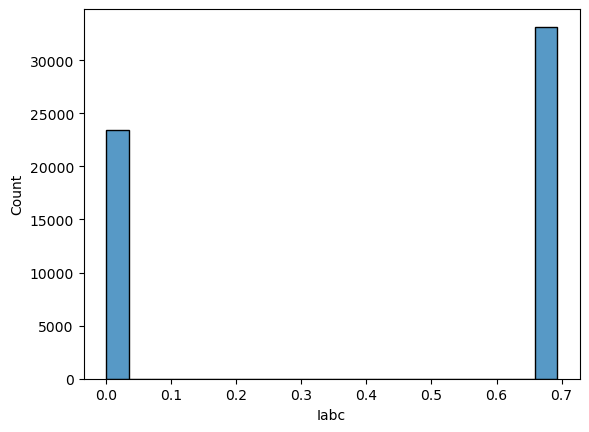

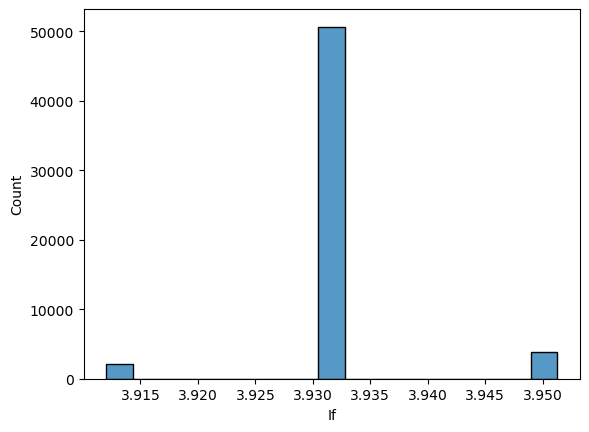

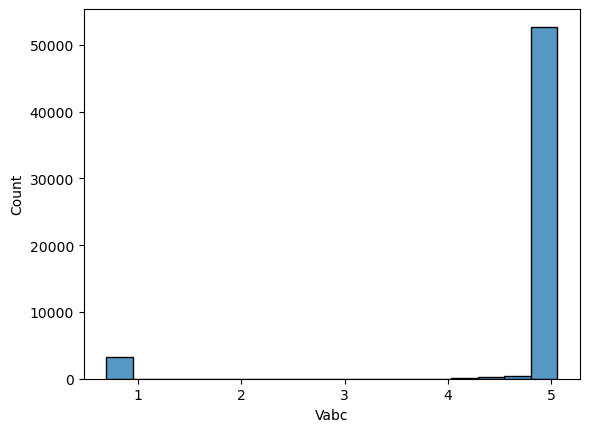

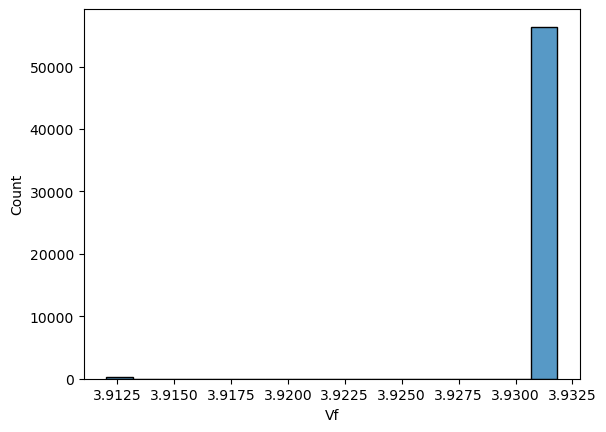

In [22]:
for i in X_transformed:
    sns.histplot(X_transformed[i])
    plt.show()

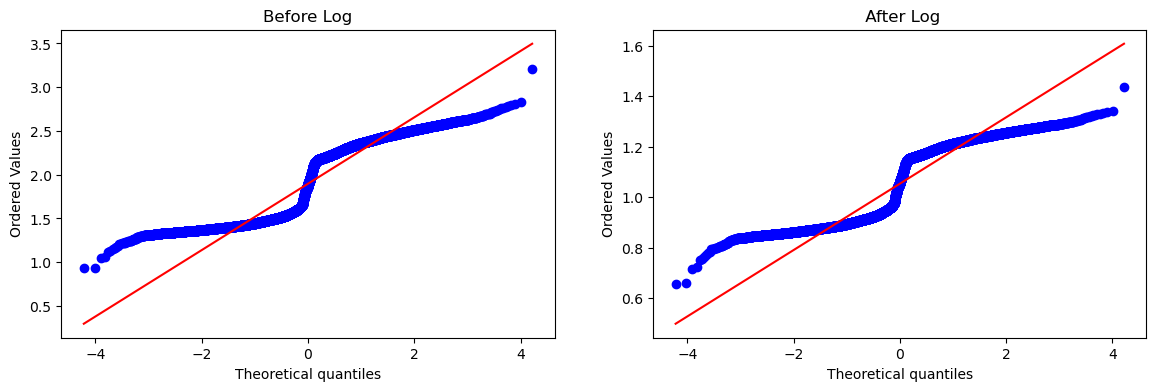

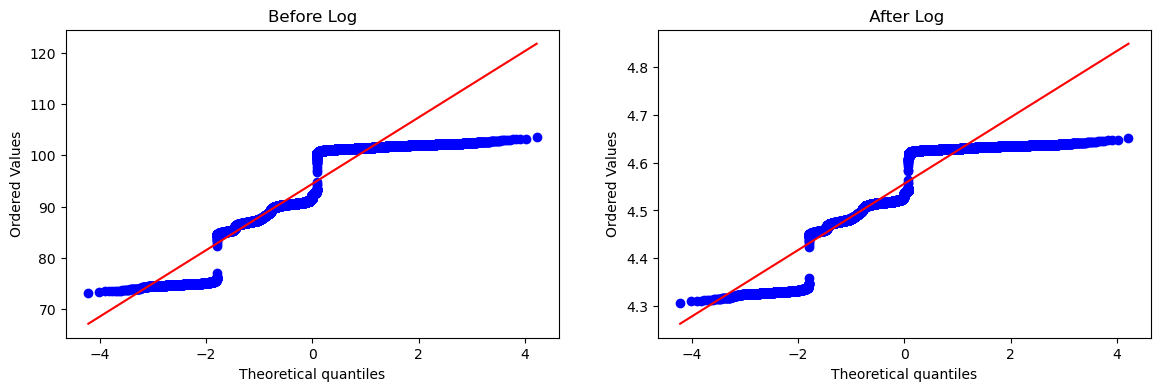

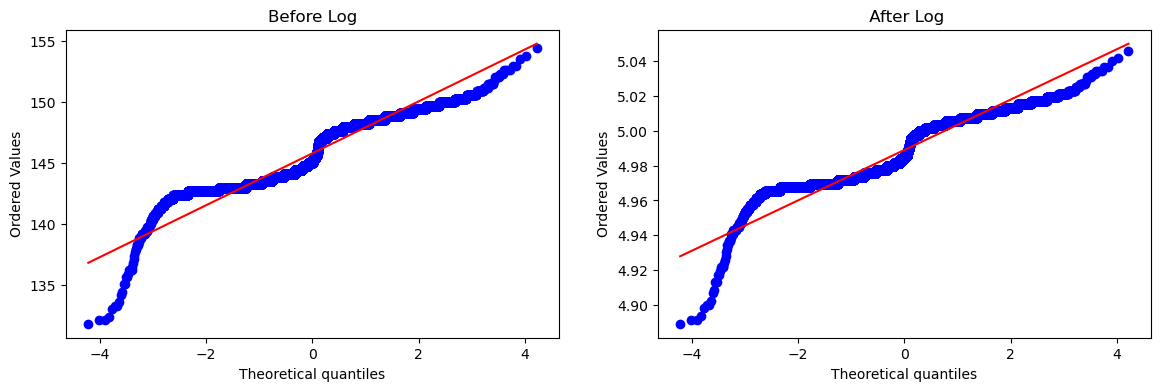

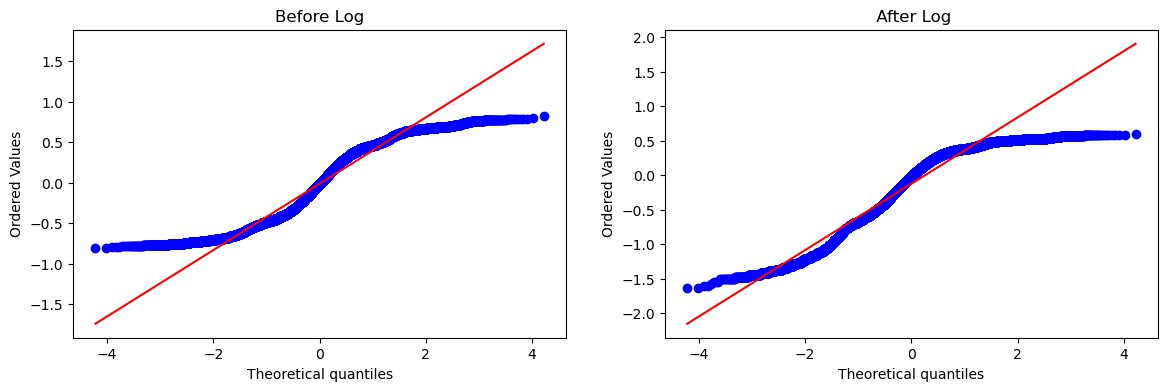

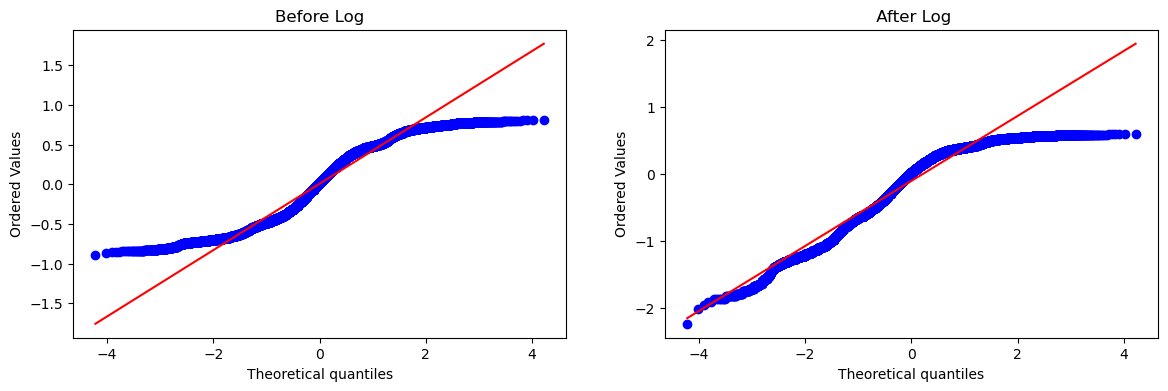

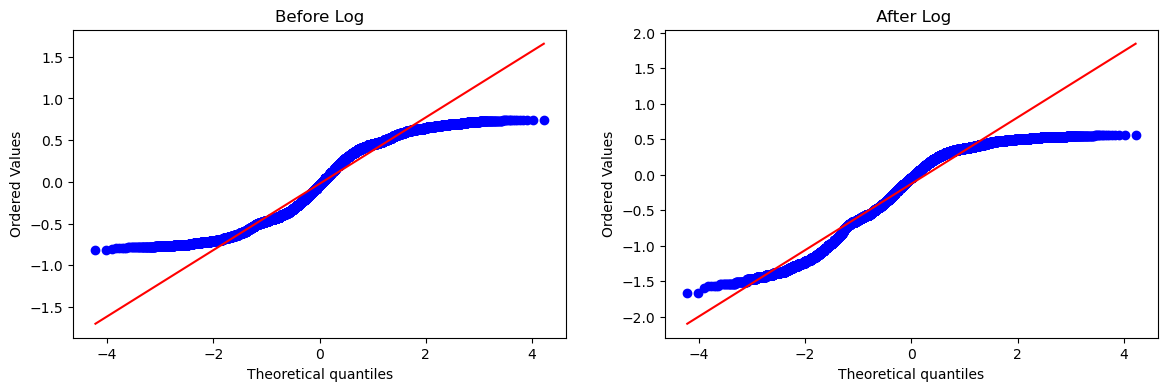

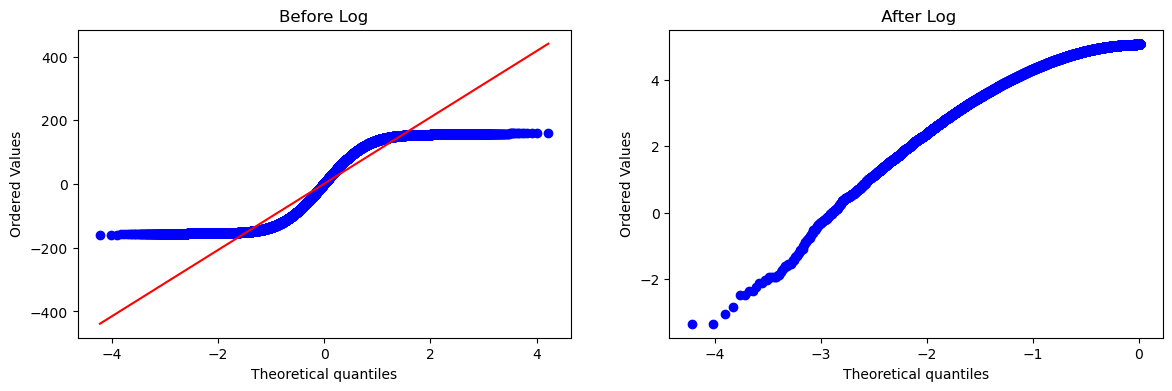

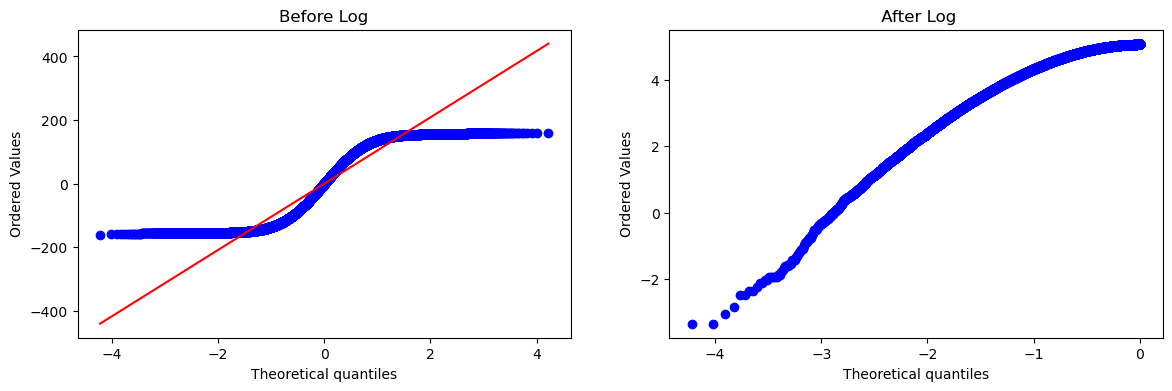

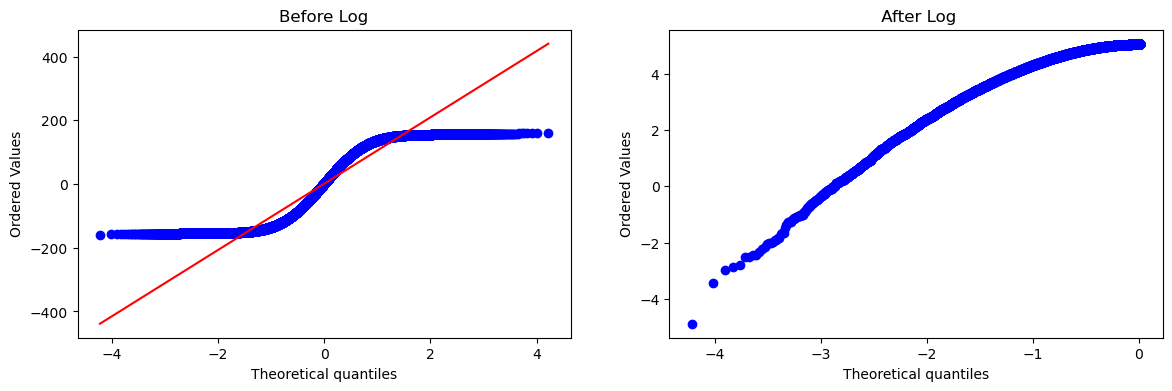

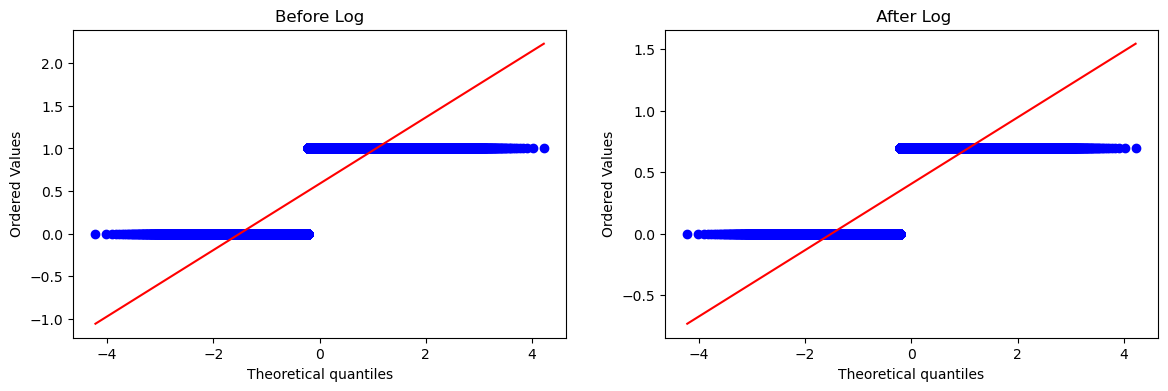

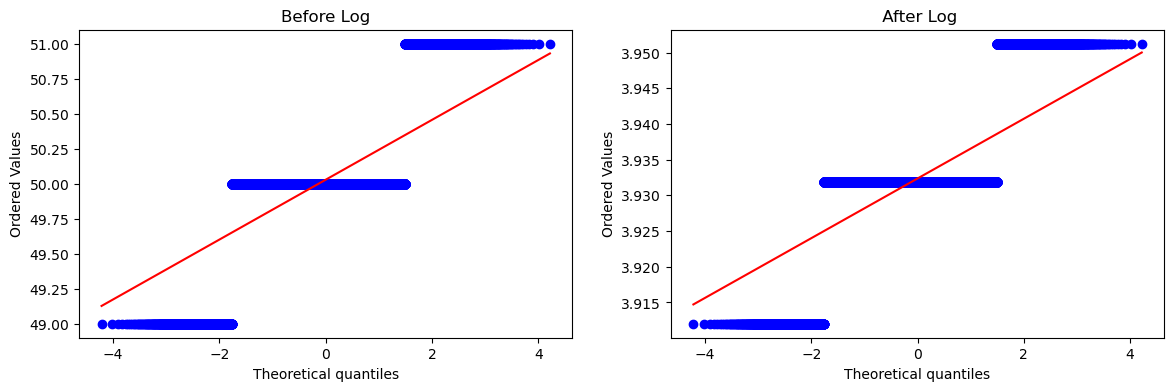

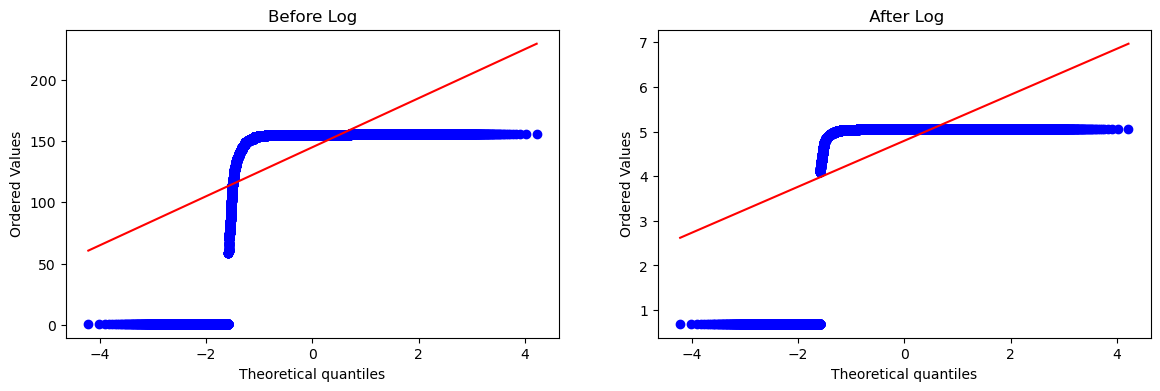

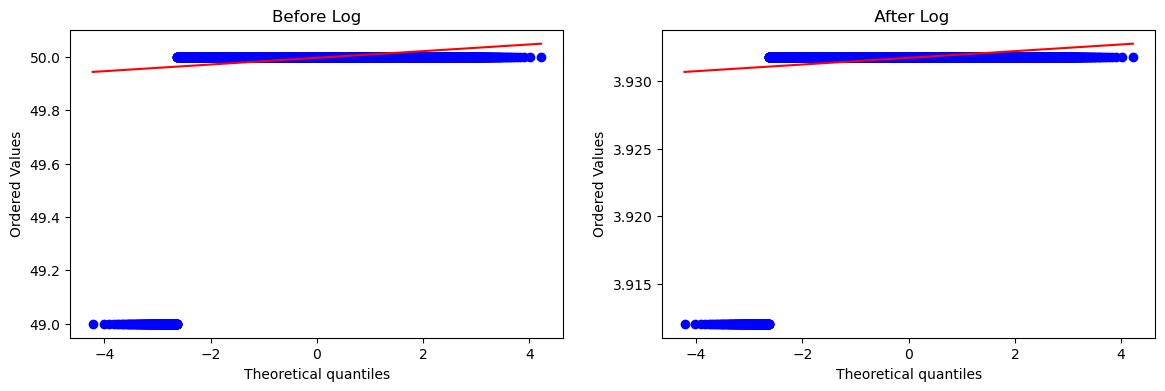

In [23]:
for i in X.columns:
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X[i], dist="norm", plot=plt)
    plt.title('Before Log')

    plt.subplot(122)
    stats.probplot(X_transformed[i], dist="norm", plot=plt)
    plt.title(' After Log')

    plt.show()

# Train_Test_Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Standard Scaler

In [25]:
scale_data = Pipeline([("scale",StandardScaler())])

In [26]:
scale_transform = ColumnTransformer([("scale",scale_data,X_train.columns)])

In [27]:
scale = scale_transform.fit(X_train)

In [28]:
joblib.dump(scale,"std")

['std']

# Logistic Regression

In [29]:
lg = LogisticRegression()

In [30]:
lg.fit(X_train,y_train)

C:\Users\Sai Ram\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sai Ram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred = lg.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.7736382095877108

# SVM

In [33]:
svc = SVC()

In [34]:
svc.fit(X_train,y_train)

C:\Users\Sai Ram\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [35]:
y_pred_svc = svc.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred_svc)

0.6345016332656485

# Random Forests

In [37]:
rfc = RandomForestClassifier(n_estimators = 50, random_state = 14, n_jobs = -1)

rfc.fit(X_train, y_train)



C:\Users\Sai Ram\AppData\Local\Temp\ipykernel_5688\259713397.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=14)

In [38]:
y_pred_rfc = rfc.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred_rfc)

0.9766928577734616

In [40]:
accuracy_score(y_train, rfc.predict(X_train))

0.9999779283554417

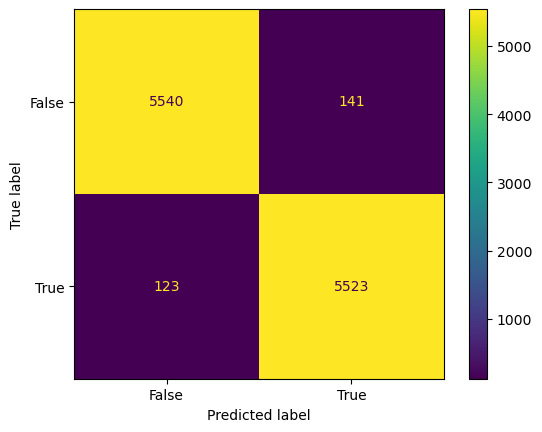

In [41]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# XGB

In [42]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
y_pred_xgb = xgb.predict(X_test)

In [44]:
print("test_accuracy:" ,accuracy_score(y_test,y_pred_xgb))

test_accuracy: 0.978988258144257


In [45]:
from sklearn.model_selection import GridSearchCV
import time

In [46]:
params = {'kernel': ['linear', 'rbf'], 'C':[1,2,3,6]}

In [47]:
xgb_cv= GridSearchCV(xgb, params)

In [48]:
start =time.time()
xgb_cv.fit(X_train,y_train)
print(time.time()-start)

[18:18:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[18:18:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[18:18:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[18:18:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "kernel" } are not used.

[18:18:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "kernel" } are not us

140.85412621498108


In [49]:
y_pred_cv = xgb_cv.predict(X_test)

In [50]:
print("test_accuracy:" ,accuracy_score(y_test,y_pred_cv))

test_accuracy: 0.978988258144257


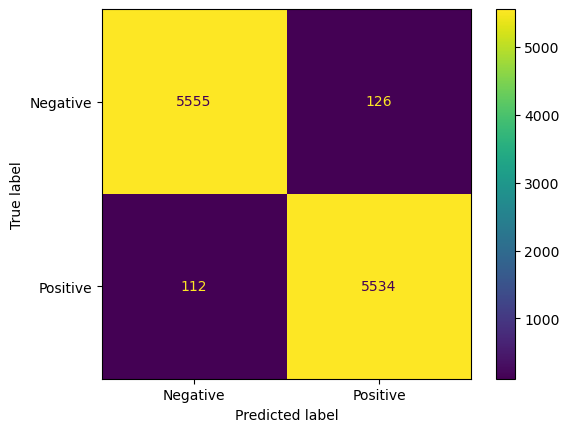

In [51]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_cv)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Negative", "Positive"])

cm_display.plot()
plt.show()

# Automl

In [52]:
automl = AutoML()

In [53]:
automl_settings = {
    "time_budget": 10,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "df.log",
}

In [54]:
y_train_arr=np.array(y_train)

In [55]:
automl.fit(X_train, y_train_arr, task="classification")

[flaml.automl.automl: 02-06 18:21:02] {2716} INFO - task = classification
[flaml.automl.automl: 02-06 18:21:02] {2718} INFO - Data split method: stratified
[flaml.automl.automl: 02-06 18:21:02] {2721} INFO - Evaluation method: cv
[flaml.automl.automl: 02-06 18:21:02] {2848} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.automl: 02-06 18:21:02] {2898} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl.automl: 02-06 18:21:02] {2994} INFO - List of ML learners in AutoML Run: ['extra_tree', 'lgbm', 'rf', 'xgboost', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 02-06 18:21:02] {3323} INFO - iteration 0, current learner extra_tree
[flaml.automl.automl: 02-06 18:22:02] {3461} INFO - Estimated sufficient time budget=10000s. Estimated necessary time budget=

C:\Users\Sai Ram\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Sai Ram\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Sai Ram\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Sai Ram\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Sai Ram\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-06 18:36:00] {3508} INFO -  at 898.8s,	estimator xgboost's best error=0.0022,	best estimator lgbm's best error=0.0022
[flaml.automl.automl: 02-06 18:36:00] {3323} INFO - iteration 4, current learner xgb_limitdepth


C:\Users\Sai Ram\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Sai Ram\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Sai Ram\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Sai Ram\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Sai Ram\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-06 18:39:26] {3508} INFO -  at 1104.8s,	estimator xgb_limitdepth's best error=0.0026,	best estimator lgbm's best error=0.0022
[flaml.automl.automl: 02-06 18:39:26] {3323} INFO - iteration 5, current learner lrl1


C:\Users\Sai Ram\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sai Ram\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sai Ram\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sai Ram\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.automl: 02-06 18:39:33] {3508} INFO -  at 1111.4s,	estimator lrl1's best error=0.2324,	best estimator lgbm's best error=0.0022


C:\Users\Sai Ram\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.automl: 02-06 18:39:34] {3772} INFO - retrain lgbm for 1.6s
[flaml.automl.automl: 02-06 18:39:34] {3779} INFO - retrained model: LGBMClassifier(colsample_bytree=0.5261441571042451,
               learning_rate=0.04824748268727149, max_bin=511,
               min_child_samples=8, n_estimators=141, num_leaves=139,
               reg_alpha=0.0028969208338993344, reg_lambda=0.024463247502165594,
               verbose=-1)
[flaml.automl.automl: 02-06 18:39:34] {3024} INFO - fit succeeded
[flaml.automl.automl: 02-06 18:39:34] {3025} INFO - Time taken to find the best model: 78.62214708328247


In [56]:
# Predict
print(automl.predict_proba(X_train))
# Export the best model
print(automl.model)

[[0.00721344 0.99278656]
 [0.99680827 0.00319173]
 [0.04354626 0.95645374]
 ...
 [0.02252641 0.97747359]
 [0.01037365 0.98962635]
 [0.99258316 0.00741684]]


# Lazy Classifier

In [57]:
from lazypredict.Supervised import LazyClassifier

In [58]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [59]:
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)
#print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [14:39<00:00, 30.32s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.98               0.98     0.98      0.98   
XGBClassifier                      0.98               0.98     0.98      0.98   
RandomForestClassifier             0.98               0.98     0.98      0.98   
LGBMClassifier                     0.97               0.97     0.97      0.97   
BaggingClassifier                  0.97               0.97     0.97      0.97   
KNeighborsClassifier               0.96               0.96     0.96      0.96   
DecisionTreeClassifier             0.96               0.96     0.96      0.96   
SVC                                0.96               0.96     0.96      0.96   
AdaBoostClassifier                 0.94               0.94     0.94      0.94   
ExtraTreeClassifier                0.92               0.92     0.92      0.92   
NuSVC                       

In [60]:
import pickle

In [61]:
pickle.dump(xgb,open("xgb.pkl","wb"))

In [62]:
pickle.dump(rfc,open("rfc.pkl","wb"))